<h1 > Amri Nader  </h1> 

<h2> Library importation <h2> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
stopwords = set(STOPWORDS)

<h2> Load the Data </h2>

In [3]:
df = pd.read_csv("giletjaune.csv", delimiter = ',',encoding = "ISO-8859-1",names=None)
df.head()

,Date_Time,Twitter_handle,Pleasure,Arousal,Tweet,sentiment
0,"12-03-18 07:30,10thCrusader,5.64,4.64,""By the ...",NaN,NaN,NaN,NaN,NaN
1,"12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,""RT @...",NaN,NaN,NaN,NaN,NaN
2,"12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhof...",NaN,NaN,NaN,NaN,NaN
3,"12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenn...",NaN,NaN,NaN,NaN,NaN
4,"12-04-18 01:06,alown6666,5.60,4.14,""@RusoAzul ...",NaN,NaN,NaN,NaN,NaN


the data is not clean nor orgnised there is some work to to lets start by removing the ; and orgnising the coloms  __


In [4]:
df=df.Date_Time.apply(lambda x: x.replace('"',''))

In [5]:
df=df.apply(lambda x: x.replace(';',''))

In [6]:
df

0     12-03-18 07:30,10thCrusader,5.64,4.64,By the t...
1     12-01-18 18:46,AhmedTarekMokh1,6.52,4.30,RT @K...
2     12-02-18 00:46,AlfArthur8,6.47,4.42,@GuyVerhof...
3     12-03-18 23:20,alicnsuna,5.24,5.52,RT @joepenn...
4     12-04-18 01:06,alown6666,5.60,4.14,@RusoAzul I...
5     12-03-18 07:53,andrew_ed_ba,5.83,3.86,As part ...
6     12-04-18 11:07,Viva la @EmmanuelMacron indeed....
7     12-04-18 02:54,Antibullshit12,5.07,4.54,RT @An...
8     12-04-18 02:54,Antibullshit12,5.07,4.54,RT @An...
9     12-02-18 17:31,AxelHuynh,4.69,4.45,TODAY, A SY...
10    12-02-18 06:07,ITâS SO SAD & REVOLTING! DONâ...
11    12-02-18 06:56,bizcom,6.37,4.22,Hi @NATO could...
12    12-03-18 04:49,bursuk,5.07,4.54,RT @TickT0Tack...
13    12-03-18 01:18,CarstenGerhardt,6.01,4.08,Powef...
14    12-03-18 14:23,cdeysson,5.55,4.91,The point of...
15    12-03-18 22:37,charmgritty,6.29,4.75,Imagine a...
16    12-04-18 05:35,clinicalwstmn,5.09,5.21,@Doctor...
17    12-03-18 09:13,DelightOxygen,5.96,4.55,Als

<h2> Reorgnising the dataset </h2>

we only need the tweets and the sentiment so lets removee any excess informtion 

In [7]:
t=df.str.replace('\d+', '')
t=t.str.replace('-', '')
#t=t.str.replace(':', '')
t=t.str.replace('.', '')
#t=t.str.replace(',', '')
t

0      :,thCrusader,,,By the time Petit Macron gets ...
1      :,AhmedTarekMokh,,,RT @Keziadventure: Quick v...
2      :,AlfArthur,,,@GuyVerhoftwat Good time for @M...
3      :,alicnsuna,,,RT @joepenney: #GiletJaune prot...
4      :,alown,,,@RusoAzul It was more like a contra...
5      :,andrew_ed_ba,,,As part francophone, way to ...
6             :,Viva la @EmmanuelMacron indeed,Positive
7      :,Antibullshit,,,RT @Antibullshit: / The Batt...
8      :,Antibullshit,,,RT @Antibullshit: / The Batt...
9      :,AxelHuynh,,,TODAY, A SYMBOL OF REPUBLIC & F...
10     :,ITâS SO SAD & REVOLTING! DONâT LET IGNO...
11     :,bizcom,,,Hi @NATO could you confirm this gu...
12     :,bursuk,,,RT @TickTTack: / The Battle For Pa...
13     :,CarstenGerhardt,,,Poweful stuff going on in...
14     :,cdeysson,,,The point of theÂ gilet jauneÂ i...
15     :,charmgritty,,,Imagine a world, dear reader,...
16     :,clinicalwstmn,,,@DoctorKropotkin @BethLynch...
17     :,DelightOxygen,,,Also the antifas on thi

In [8]:
len(t)

51

<h6> removing the user id </h6>

to remove the user id we can skip the first "," :


In [9]:
for i in range(len(t)) :
    t[i]=t[i].split(',', 1)[-1]
    t[i]=t[i].split(',', 1)[-1]


In [10]:
t

0     ,,By the time Petit Macron gets back to Paris,...
1     ,,RT @Keziadventure: Quick visit to the #ArcDe...
2     ,,@GuyVerhoftwat Good time for @MayorofLondon ...
3     ,,RT @joepenney: #GiletJaune protestors beatin...
4     ,,@RusoAzul It was more like a contract betwee...
5     ,,As part francophone, way to make the #GiletJ...
6                                              Positive
7     ,,RT @Antibullshit: / The Battle For Paris! Ye...
8     ,,RT @Antibullshit: / The Battle For Paris! Ye...
9     ,,TODAY, A SYMBOL OF REPUBLIC & FREEDOM HAS BE...
10                France https://tco/lzjuDdjVQ,Negative
11    ,,Hi @NATO could you confirm this guy is membe...
12    ,,RT @TickTTack: / The Battle For Paris! Yello...
13    ,,Poweful stuff going on in France ð® #Gilet...
14    ,,The point of theÂ gilet jauneÂ is to ensure ...
15    ,,Imagine a world, dear reader, where the most...
16    ,,@DoctorKropotkin @BethLynch @VryKranky Misma...
17    ,,Also the antifas on this video trying to

Removing the numbers ! :

In [11]:
import re
re.sub(r'@[A-Za-z0-9]+','',t[2])

',, Good time for  to run a TV ad campaign across Europe and USA on the virtues of London as a tourist destination Doubt Paris will be seeing many new Christmas bookings #giletjaune'

In [12]:
t[2]

',,@GuyVerhoftwat Good time for @MayorofLondon to run a TV ad campaign across Europe and USA on the virtues of London as a tourist destination Doubt Paris will be seeing many new Christmas bookings #giletjaune'


### Defining data cleaning function

With above five data cleaning task, I will first define data cleaning function, and then will be applied to the whole dataset. Tokenization, stemming/lemmatization, stop words will be dealt with later stage when creating matrix with either count vectorizer or Tfidf vectorizer.


In [13]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
tok = WordPunctTokenizer()

In [14]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [15]:
test_result = []
for k in range(len(t)):
    test_result.append(tweet_cleaner(t[k]))

__lets chek the data after removing the hashtag and the links and tags :__

In [16]:
test_result

['by the time petit macron gets back to paris he ll be browning his trousers neutral',
 'rt quick visit to the arcdetriomphe today turned into an even quicker one huge police presence most giletjaune protestors seemed very peaceful lots of women young people and even dogs livecoverage bbcnews paris positive',
 'good time for to run a tv ad campaign across europe and usa on the virtues of london as a tourist destination doubt paris will be seeing many new christmas bookings giletjaune',
 'rt giletjaune protestors beating police out of the arc de triomphe in paris negative',
 'it was more like a contract between the two side police left their mask and giletjaune left the place negative',
 'as part francophone way to make the giletjaune movement look like a bunch of whiny and spoiled brats by not only burning and looting cars and hospitals but also effectively damaging historical sites negative',
 'positive',
 'rt the battle for paris yellow vest protests compilation negative',
 'rt the b

#### we ll extract the tweets and the sentiement apart :

In [17]:
sentiment = []
tweets = []
for i in range(len(test_result)):
    sentiment.append(test_result[i][-8:])
    tweets.append(test_result[i][:-8])

In [18]:
tweets

['by the time petit macron gets back to paris he ll be browning his trousers',
 'rt quick visit to the arcdetriomphe today turned into an even quicker one huge police presence most giletjaune protestors seemed very peaceful lots of women young people and even dogs livecoverage bbcnews paris ',
 'good time for to run a tv ad campaign across europe and usa on the virtues of london as a tourist destination doubt paris will be seeing many new christmas bookings gi',
 'rt giletjaune protestors beating police out of the arc de triomphe in paris ',
 'it was more like a contract between the two side police left their mask and giletjaune left the place ',
 'as part francophone way to make the giletjaune movement look like a bunch of whiny and spoiled brats by not only burning and looting cars and hospitals but also effectively damaging historical sites ',
 '',
 'rt the battle for paris yellow vest protests compilation ',
 'rt the battle for paris yellow vest protests compilation ',
 'today a sy

In [19]:
data_clean = pd.DataFrame({'tweets':tweets})
data_clean['sentiment']=sentiment
datatest=data_clean
data_clean.head()

,tweets,sentiment
0,by the time petit macron gets back to paris he...,neutral
1,rt quick visit to the arcdetriomphe today turn...,positive
2,good time for to run a tv ad campaign across e...,letjaune
3,rt giletjaune protestors beating police out of...,negative
4,it was more like a contract between the two si...,negative


<h3> Removing neutral tweets </h3>

In [20]:
data_clean=data_clean[data_clean['sentiment'].str.contains("positive|negative")]

In [21]:
data_clean.head(3)

,tweets,sentiment
1,rt quick visit to the arcdetriomphe today turn...,positive
3,rt giletjaune protestors beating police out of...,negative
4,it was more like a contract between the two si...,negative


<h2> Train test split </h2>

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_clean['tweets'], data_clean['sentiment'], test_size=0.10)
train_tweets = pd.DataFrame()

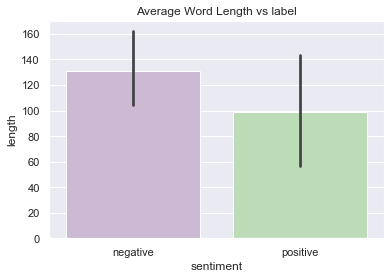

In [76]:
train_tweets['length'] = X_train.apply(len)
train_tweets['sentiment'] = y_train
fig1 = sns.barplot('sentiment','length',data = train_tweets,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

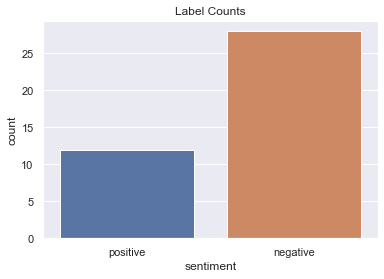

In [78]:
fig2 = sns.countplot(x= 'sentiment',data = data_clean)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

<h3> Postive / Negative tweet separation </h3>

In [24]:
positive = data_clean[data_clean['sentiment'].str.contains("positive")]

In [25]:
positive.head(3)

,tweets,sentiment
1,rt quick visit to the arcdetriomphe today turn...,positive
6,,positive
9,today a symbol of republic freedom has been st...,positive


In [26]:
negative = data_clean[data_clean['sentiment'].str.contains("negative")]

In [27]:
negative.head(3)

,tweets,sentiment
3,rt giletjaune protestors beating police out of...,negative
4,it was more like a contract between the two si...,negative
5,as part francophone way to make the giletjaune...,negative


<h3> Word cloud </h3>

In [28]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [29]:
text_all = " ".join(review for review in data_clean.tweets)
print ("There are {} words in the combination of the tweets.".format(len(text_all)))

There are 4745 words in the combination of all review.


In [31]:
text_postive = " ".join(review for review in positive.tweets)
print ("There are {} words in the combination of positive tweets.".format(len(text_postive)))

There are 1309 words in the combination of all tweets.


In [33]:
text_postive = " ".join(review for review in negative.tweets)
print ("There are {} words in the combination of negative tweets.".format(len(text_postive)))

There are 3435 words in the combination of negative tweets.


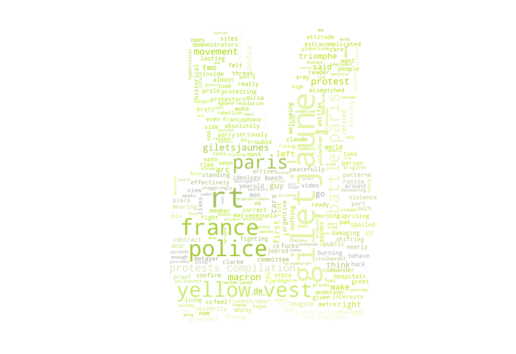

In [34]:
mask = np.array(Image.open("gilet-jauuuune-1.jpg"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text_postive)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[9,9])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("fra.png", format="png")

#plt.show()

__for the positve words wecan see giltes jaune which indecate that the movement have a positive support some other wrods like freedome outcome young also appear which indacte that the movment reprsent freedome and led by the youngs__

In [35]:
text_negative = " ".join(review for review in negative.tweets)
print ("There are {} words in the combination of all review.".format(len(text_negative)))

There are 3435 words in the combination of all review.


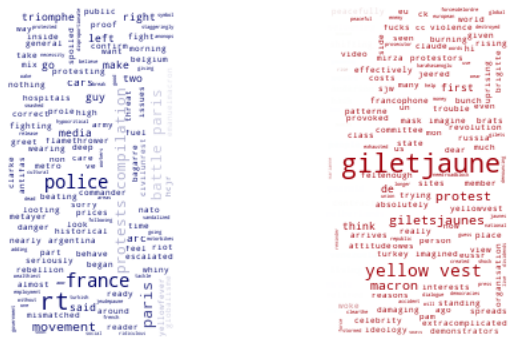

In [36]:
mask = np.array(Image.open("682-004-5AC19A71.jpg"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text_negative)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[9,9])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("fra.png", format="png")

#plt.show()

__for the negative wordcloud we can find police and macron this indicate that both of those parties have neegtive support on the net  we can alos some words that indcate voilance like fight and  threat__

Conclusion : 
the tweets that we have at our disposal are supportive for the movement and what it represent but at the same time they are against macron police and the vilance that is happening 

<h3> NLTK </h3>

#### Toknization 

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NADER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
import nltk
from nltk.tokenize import sent_tokenize
text=text_all
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['rt quick visit to the arcdetriomphe today turned into an even quicker one huge police presence most giletjaune protestors seemed very peaceful lots of women young people and even dogs livecoverage bbcnews paris  rt giletjaune protestors beating police out of the arc de triomphe in paris  it was more like a contract between the two side police left their mask and giletjaune left the place  as part francophone way to make the giletjaune movement look like a bunch of whiny and spoiled brats by not only burning and looting cars and hospitals but also effectively damaging historical sites   rt the battle for paris yellow vest protests compilation  rt the battle for paris yellow vest protests compilation  today a symbol of republic freedom has been stained  france  hi could you confirm this guy is member of your organisation and his attitude is correct against giletjaune that seriously make me think about nato patterne against russia cc com view  rt the battle for paris yellow vest protest

In [39]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['rt', 'quick', 'visit', 'to', 'the', 'arcdetriomphe', 'today', 'turned', 'into', 'an', 'even', 'quicker', 'one', 'huge', 'police', 'presence', 'most', 'giletjaune', 'protestors', 'seemed', 'very', 'peaceful', 'lots', 'of', 'women', 'young', 'people', 'and', 'even', 'dogs', 'livecoverage', 'bbcnews', 'paris', 'rt', 'giletjaune', 'protestors', 'beating', 'police', 'out', 'of', 'the', 'arc', 'de', 'triomphe', 'in', 'paris', 'it', 'was', 'more', 'like', 'a', 'contract', 'between', 'the', 'two', 'side', 'police', 'left', 'their', 'mask', 'and', 'giletjaune', 'left', 'the', 'place', 'as', 'part', 'francophone', 'way', 'to', 'make', 'the', 'giletjaune', 'movement', 'look', 'like', 'a', 'bunch', 'of', 'whiny', 'and', 'spoiled', 'brats', 'by', 'not', 'only', 'burning', 'and', 'looting', 'cars', 'and', 'hospitals', 'but', 'also', 'effectively', 'damaging', 'historical', 'sites', 'rt', 'the', 'battle', 'for', 'paris', 'yellow', 'vest', 'protests', 'compilation', 'rt', 'the', 'battle', 'for', 'pa

In [40]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 424 samples and 780 outcomes>


In [41]:
fdist.most_common(2)

[('the', 41), ('giletjaune', 25)]

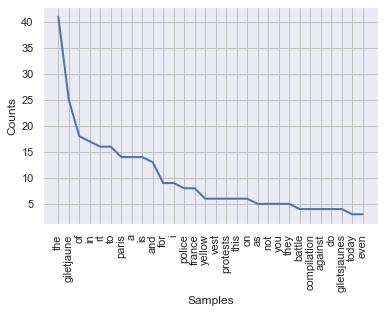

In [42]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

##### we have some unusafull words as the most commun used words so lets remove them then look again 

In [43]:
#Removing Stopwords
filtered_sent=[]
for w in tokenized_word:
    if w not in stopwords:
        filtered_sent.append(w)
#print("Tokenized Sentence:",tokenized_word)
#print("Filterd Sentence:",filtered_sent)

In [44]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_sent)
print(fdist)

<FreqDist with 353 samples and 491 outcomes>


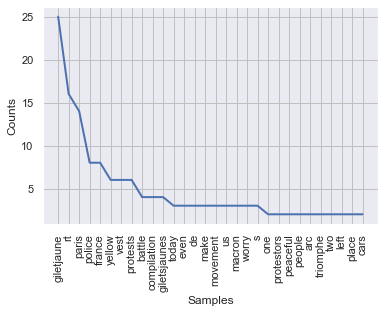

In [45]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

Lexicon Normalization

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

In [46]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

#print("Filtered Sentence:",filtered_sent)
#print("Stemmed Sentence:",stemmed_words)

POS Tagging

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [47]:
str1 = ' '.join(stemmed_words)

In [48]:
sent = str1
tokens=nltk.word_tokenize(sent)
print(tokens)

['rt', 'quick', 'visit', 'arcdetriomph', 'today', 'turn', 'even', 'quicker', 'one', 'huge', 'polic', 'presenc', 'giletjaun', 'protestor', 'seem', 'peac', 'lot', 'women', 'young', 'peopl', 'even', 'dog', 'livecoverag', 'bbcnew', 'pari', 'rt', 'giletjaun', 'protestor', 'beat', 'polic', 'arc', 'de', 'triomph', 'pari', 'contract', 'two', 'side', 'polic', 'left', 'mask', 'giletjaun', 'left', 'place', 'part', 'francophon', 'way', 'make', 'giletjaun', 'movement', 'look', 'bunch', 'whini', 'spoil', 'brat', 'burn', 'loot', 'car', 'hospit', 'effect', 'damag', 'histor', 'site', 'rt', 'battl', 'pari', 'yellow', 'vest', 'protest', 'compil', 'rt', 'battl', 'pari', 'yellow', 'vest', 'protest', 'compil', 'today', 'symbol', 'republ', 'freedom', 'stain', 'franc', 'hi', 'confirm', 'guy', 'member', 'organis', 'attitud', 'correct', 'giletjaun', 'serious', 'make', 'think', 'nato', 'pattern', 'russia', 'cc', 'view', 'rt', 'battl', 'pari', 'yellow', 'vest', 'protest', 'compil', 'pow', 'stuff', 'go', 'franc', 

<h3>Feature Generation using Bag of Words</h3>

In the Text Classification Problem, we have a set of texts and their respective labels. But we directly can't use text for our model. You need to convert these text into some numbers or vectors of numbers.

Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

<h3> Modeling </h3>

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
data_train=datatest[:43]
data_test =datatest[43:]
vector=CountVectorizer()
vector.fit(data_train['tweets'])
#print("vocabulary" + str(vector.vocabulary_)+'\n\n')
#print("features "+ str(vector.get_feature_names()))
count=vector.transform(data_train['tweets'])
print("the shape of the count" +str(count.shape)+'\n\n')
print(str(count.toarray()))

the shape of the count(43, 460)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
from sklearn.feature_extraction.text import TfidfTransformer
vectoriser = TfidfTransformer()
vectoriser.fit(count)
freq = vectoriser.transform(count)
print(freq.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.19294762 0.        ]
 [0.         0.         0.20662373 ... 0.         0.         0.        ]
 ...
 [0.14778941 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [52]:
import sklearn.datasets as skd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])
data_train=datatest[:43]
data_test =datatest[43:]


In [53]:
# train the model
text_clf.fit(data_train['tweets'], data_train['sentiment'])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [54]:
# Predict the test cases
predicted = text_clf.predict(data_test['tweets'])

from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np

print('Accuracy achieved is ' + str(np.mean(predicted == data_test['sentiment'])))

Accuracy achieved is 0.625


<h2> svm </h2>

In [55]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [56]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_train['tweets'])
X_train_counts.shape

(43, 460)

In [57]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(43, 460)

In [58]:
import numpy as np
#twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [60]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42))])

text_clf_svm = text_clf_svm.fit(data_train['tweets'], data_train['sentiment'])
predicted_svm = text_clf_svm.predict(data_test['tweets'])
np.mean(predicted_svm == data_test['sentiment'])

0.625

Both of our model gave us 0.625 accuracy which is not condired very good this is maybe due to the dataset beeing too small 

In [84]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


In [86]:
print(classification_report(predicted_svm,data_test['sentiment']))
print ('\n')


              precision    recall  f1-score   support

    letjaune       0.00      0.00      0.00         1
    negative       0.80      1.00      0.89         4
     neutral       0.00      0.00      0.00         2
    positive       0.33      1.00      0.50         1

    accuracy                           0.62         8
   macro avg       0.28      0.50      0.35         8
weighted avg       0.44      0.62      0.51         8





In [125]:
print(confusion_matrix(predicted_svm,data_test['sentiment']))


[[3 2]
 [2 1]]


<h3> Conclusion </h3> 
- the data that we did scrap wasnt clean so we spent some time cleaning it and orgninsing it 
- the text is an ensmble of tweets so we did to perfome a deeper cleaning ( elmniatin @ and the html tags )
- from the word cloud we did extract importat information about the posstion of the people about macron the movement and police 
- we did try two types of models svm and naive byies both gave midicore result this is due to the size of the dataset 
- increasing the size of the dataset may give better classifer 